$\text{IMPORTS}$

In [12]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

$\textbf{PROBLEM 1:}\\
\max \{x_{12} + x_{22} + x_{23} \} \\
S.T. \\
x_{11} + x_{23} \le 12 \\
x_{11} + x_{12} + x_{13} = 20  \\
x_{21} + x_{22} + x_{23} = 20 \\
x_{11} + x_{21} = 10 \\
x_{12} + x_{22} = 20 \\
x_{13} + x_{23} = 10 \\
x_{ij} \ge 0, \ \forall \ i = 1, 2, \ j = 1, 2, 3$

$$
\textbf{QUESTION 1} \\~\\
\text{Since we have equality constraints and x}\ge 0 \text{ we are bounded.} \\
\text{For example, if } x_{11}, x_{13}, x_{21}, x_{23} \gt 10 \text{, the constraints that contain them are violated}.\\
\text{Similarly, if } x_{12}, x_{22} \gt 20 \text{, the constraints that contain them arae violated.}\\
\text{If P is bounded,  we will have a finite number of extreme points} \Rightarrow \\
\text{Every point is a convex combination of extreme points}.
$$



$$\textbf{QUESTION 2}$$

In [2]:
D = np.array([1, 0, 0, 0, 0, 1])
b = 12
c = np.array([0, 1, 0, 0, 1, 1]).T

print(f"{c=}\n{D=}\n{b=}")

c=array([0, 1, 0, 0, 1, 1])
D=array([1, 0, 0, 0, 0, 1])
b=12


$$\textbf{QUESTION 3}\\~\\
\text{RMP:}\\
\max \{30 \lambda_1 + 20 \lambda2\} \\
S.T. \\
20 \lambda_1 + 0 \lambda_2 \le 12 \\
\lambda_1 + \lambda_2 = 1 \\
\lambda_1 \ge 0, \lambda_2 \ free

$$

In [3]:
# Extreme Points
x1 = np.array([10, 10, 0, 0, 10, 10])
x2 = np.array([0, 10, 0, 0, 10, 0])

# Objective Function Coefficients
obj_coeff1 = c @ x1
obj_coeff2 = c @ x2

# Constraint Coefficients
constraint_coeff1 = D @ x1
contraint_coeff2 = D @ x2

print(f"{obj_coeff1=}\n{obj_coeff2=}\n{constraint_coeff1=}\n{contraint_coeff2=}")

obj_coeff1=30
obj_coeff2=20
constraint_coeff1=20
contraint_coeff2=0


$$\textbf{QUESTION 4}$$

In [4]:
B = np.matrix([[20, 0], [1, 1]])
b_inv = np.linalg.inv(B)

helper = np.array([12, 1])
optimal = b_inv @ helper
lam1_hat, lam2__hat = np.round(optimal[0, 0], 1), np.round(optimal[0, 1], 1)
print(f"The Optimal Solution:\n{optimal}")

The Optimal Solution:
[[0.6 0.4]]



$$\textbf{QUESTION 5}
$$

In [5]:
# Find Optimal Dual Variable (First Way)
c_b = np.array([30, 20])
hat = c_b @ b_inv
y_hat, r_hat = hat[0, 0], hat[0, 1]
print(f"The Optimal Dual Variable (First Way):\n{hat}")

The Optimal Dual Variable (First Way):
[[ 0.5 20. ]]


$$
\text{Find Optimal Dual Variable (Second Way:)}\\
\text{Dual of RMP:}\\
\min \{12 a_1 + 1 a_2 \} \\
S.T. \\
20 a_1 + 1 a_2 \ge 30 \\
0 a_1 + 1 a_2 = 20 \\
a_1 \ge 0, a_2 \ free \\~\\
\text{Therefore by Dual Slackness, we have:} \\
\lambda_1 (20 a_1 + 1 a_2 - 30) = 0 \\ 
\lambda_2 (0 a_1 + 1 a_2 - 20) = 0 \\~\\
\text{We know that } \lambda_1, \lambda_2 \ge 0 \Rightarrow \\
20 a_1 + 1 a_2 - 30 = 0 \\
0 a_1 + 1 a_2 - 20 = 0  \Rightarrow \\
20 a_1 + 1 a_2 = 30 \\
0 a_1 + 1 a_2 = 20 \Rightarrow \\
a_1 = 0.5 \\
a_2 = 20 \\~\\

\textbf{QUESTION 6}\\~\\
\text{We should terminate the Dantzig-Wolfe decomposition algorithm when } Z = \hat r = 20 \\
(SP) = Z = \max \{c^T - \hat y D\} x \\
S.T. \\
x \in P
$$

In [8]:
# Solve the (SP)
obj_func_coeffs = c - (y_hat * D)
print(f"{obj_func_coeffs=}")

obj_func_coeffs=array([-0.5,  1. ,  0. ,  0. ,  1. ,  0.5])


$$
Z = \max \{-0.5 x_{11} + 1 x_{12} + 0 x_{13} + 0 x_{21} + 1 x_{22} + 0.5 x_{23}\}\\
S.T. \\
x_{11} + x_{12} + x_{13} = 20 \\
x_{21} + x_{22} + x_{23} = 20 \\
x_{11} + x_{21} = 10 \\
x_{12} + x_{22} = 20 \\
x_{13} + x_{23} = 10 \\
x_{ij} \ge 0 \ \forall \ i = 1, 2, \ j = 1, 2, 3 \\~\\

\text{To Maximize:}\\
x^3 = [0, 10, 10, 10, 10, 0] \Rightarrow \\
Z = 20 = \hat r \Rightarrow \\
 \text{We terminate and say the current solution is optimal for the master problem.}\\
x^* = 

$$

$$
\textbf{QUESTION 7}
$$

$\textbf{PROBLEM 2:}$
$$\textbf{QUESTION 1}$$



In [13]:
img_data = np.loadtxt("clownImage.txt")

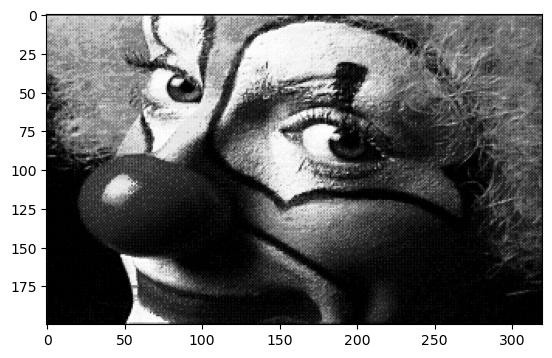

In [20]:
plt.imshow(img_data)

$$\textbf{QUESTION 2}$$

In [25]:
U, s, vh = np.linalg.svd(a=img_data)

$$\textbf{QUESTION 3}$$

In [27]:
m, n, r1, r2, r3 = U.shape[0], vh.shape[0], 5, 15, 25
x5 = (m + n) * (r1 / (m * n))
x15 = (m + n) * (r2 / (m * n))
x25 = (m + n) * (r3 / (m * n))

0.040625 0.121875 0.203125


$$\textbf{QUESTION 4}$$